In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Plot network errrors for 3-sigma width test dataset

In [2]:
from matplotlib import cm
from Chempy.neural import neural_output
from Chempy.parameter import ModelParameters

a=ModelParameters()

# Load datasets
data_tr = np.load('/home/philcox/Save/Nomoto_net/training_param_grid.npy')
data_v = np.load('/home/philcox/Save/Nomoto_net/3.0_sigma_param_grid.npy') # Use 3 sigma width training dataset

In [8]:
def neural_errors():
    """ Calculate median absolute error between Chempy and neural network for each set of parameters.
    """
    # Load abundances
    model_abundances = np.load('/home/philcox/Save/Nomoto_net/3.0_sigma_abundances.npy')
    # Calculate absolute model error
    error=[]
    for i in range(len(data_v)):
        if i % 1000 == 0:
            print(i)
        predicted_abundances = neural_output(data_v[i])
        error.append(np.absolute(predicted_abundances-model_abundances[i]))
    return np.std(error,axis=1)

param_error = neural_errors()

0
1000
2000


In [10]:
# Initialize plot
plt.clf()
text_size = 16
axis_size = 12
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=axis_size)
plt.rc('ytick', labelsize=axis_size)
plt.rc('axes', labelsize=axis_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
      'font.family' : 'libertine',
      'text.latex.unicode': True,
      }
plt.rcParams.update(params)
parameter_names = [r'$\alpha_\mathrm{IMF}$',r'$\log_{10}(\mathrm{N_{Ia}})$',
               r'$\log_{10}(\mathrm{SFE})$',
               r'$\log_{10}(\mathrm{SFR_{peak}})$',r'x_{out}']

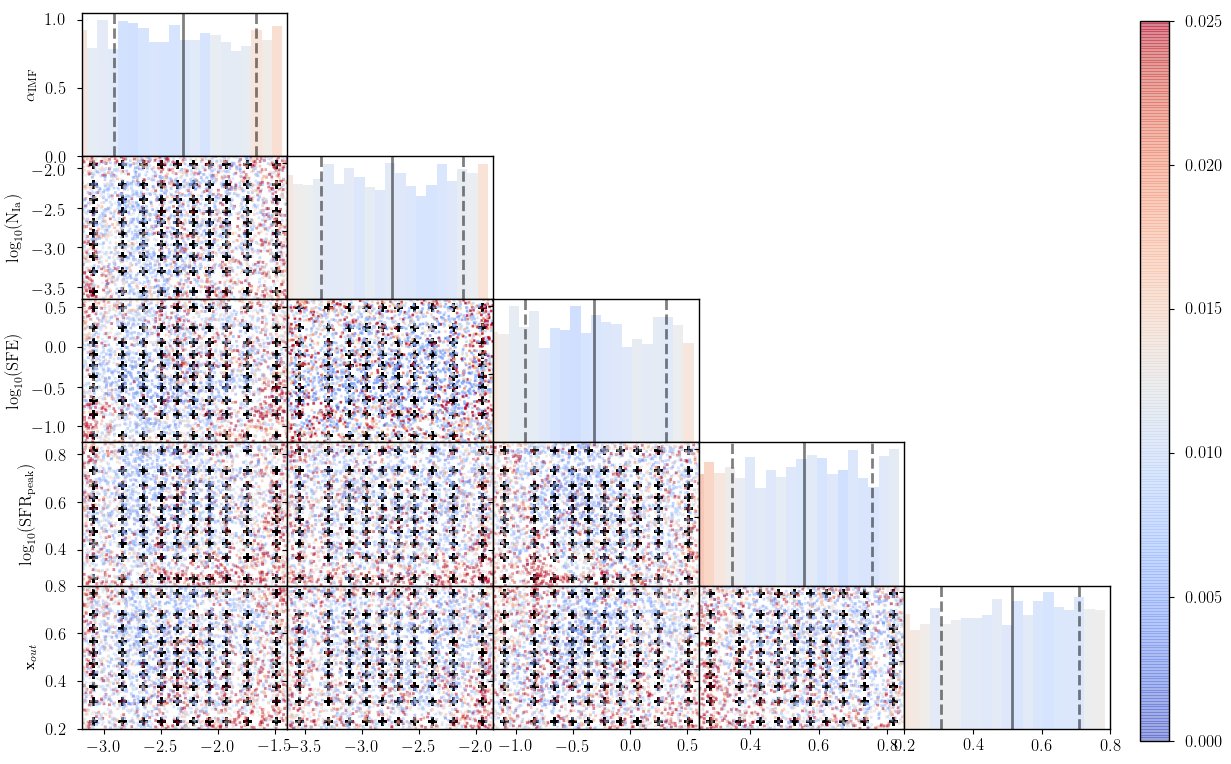

In [25]:
# Plot settings
fig,axes = plt.subplots(nrows = len(a.p0)-1, ncols = len(a.p0)-1,figsize=(14.69,8.0),dpi=100)
alpha = 0.5
lw=2 # Linewidth
left = 0.1 # Left side of subplots
right = 0.8 # Right side
bottom = 0.075
top = 0.97
wspace = 0.0 # blankspace width between subplots
hspace = 0.0 # blankspace height between subplots
color_max = 0.025
plt.subplots_adjust(left=left,bottom=bottom,right=right,top=top,wspace=wspace,hspace=hspace)

# Create plot
for i in range(len(a.p0)-1):
    for j in range(len(a.p0)-1):
        axes[i,j].locator_params(nbins=4)
        if j==1:
            axes[i,j].locator_params(nbins=4)
        if i==j:
            counts,edges = np.histogram(np.asarray(data_v[:,j]),bins=20)
            max_count = float(np.max(counts))
            counts = np.divide(counts,max_count)
            median = np.zeros(len(edges)-1)
            for k in range(len(edges)-1):
                choice = np.logical_and(np.greater(data_v[:,j],edges[k]),np.less(data_v[:,j],edges[k+1]))
                error=np.extract(choice,param_error)
                if len(error) != 0:
                    median[k] = np.median(error)
            colors = cm.coolwarm(median/color_max)
            axes[i,j].bar(left = edges[:-1], height=counts, width = edges[1]-edges[0],
                                color=colors,alpha=alpha, linewidth=0)
            axes[i,j].set_xlim(min(data_v[:,j]),max(data_v[:,j]))
            axes[i,j].set_ylim(0,1.05)
            if j !=0:
                plt.setp(axes[i,j].get_yticklabels(), visible=False)
            axes[i,j].vlines(np.percentile(data_v[:,j],15.865),axes[i,j].get_ylim()[0],axes[i,j].get_ylim()[1], color = 'k',alpha=alpha,linewidth = lw,linestyle = 'dashed')
            axes[i,j].vlines(np.percentile(data_v[:,j],100-15.865),axes[i,j].get_ylim()[0],axes[i,j].get_ylim()[1], color = 'k',alpha=alpha,linewidth = lw,linestyle = 'dashed')
            axes[i,j].vlines(np.percentile(data_v[:,j],50),axes[i,j].get_ylim()[0],axes[i,j].get_ylim()[1], color = 'k',alpha=alpha,linewidth = lw)
        if i>j:
            if j !=0:
                plt.setp(axes[i,j].get_yticklabels(), visible=False)
            P2 = axes[i,j].scatter(data_tr[:,j],data_tr[:,i],c='k',marker='+',s=40,lw=2)
            P1 = axes[i,j].scatter(data_v[:,j],data_v[:,i],marker='x',alpha=alpha,
                                            c=param_error,vmin=0,vmax=color_max,cmap=cm.coolwarm,s=3)
            axes[i,j].set_xlim(min(data_v[:,j]),max(data_v[:,j]))
            axes[i,j].set_ylim(min(data_v[:,i]),max(data_v[:,i]))
        if j>i:
            axes[i,j].axis('off')
        if i == len(a.p0)-1:
            axes[i,j].set_xlabel(parameter_names[j])
        if j ==0:
            axes[i,j].set_ylabel(parameter_names[i])
        if i==2 and j == 1:
            cplot = axes[i,j].scatter(data_v[:,j],data_v[:,i],marker='.',alpha=alpha,
                                                c=param_error,vmin=0,vmax=color_max,cmap=cm.coolwarm,s=3)
            axes[i,j].set_xlim(min(data_v[:,j]),max(data_v[:,j]))
            axes[i,j].set_ylim(min(data_v[:,i]),max(data_v[:,i]))
cax=fig.add_axes([0.82,0.06,0.02,0.9])
plt.colorbar(cplot,cax=cax)

plt.show()
fig.savefig('PaperPlots/Neural_error_plot.pdf',bbox_inches='tight')
# One plot is different....

In [27]:
counts,edges = np.histogram(np.asarray(data_v[:,j]),bins=20)

In [28]:
edges[:-1]

array([ 0.20020056,  0.2301876 ,  0.26017464,  0.29016168,  0.32014872,
        0.35013576,  0.3801228 ,  0.41010984,  0.44009688,  0.47008392,
        0.50007096,  0.530058  ,  0.56004504,  0.59003208,  0.62001912,
        0.65000616,  0.6799932 ,  0.70998025,  0.73996729,  0.76995433])

In [20]:
max(edges)

0.79994136635089685